In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *
from pathlib import Path
import os
import shutil

In [3]:
path = Path('/home/rubn/Desktop/resp')

In [4]:
dx = ImageList.from_folder(path).split_by_folder(train='train', valid='val').label_from_folder().databunch().normalize(imagenet_stats)

In [5]:
dx

ImageDataBunch;

Train: LabelList (5515 items)
x: ImageList
Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000)
y: CategoryList
Healthy,Healthy,Healthy,Healthy,Healthy
Path: /home/rubn/Desktop/resp;

Valid: LabelList (1383 items)
x: ImageList
Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000)
y: CategoryList
Healthy,Healthy,Healthy,Healthy,Healthy
Path: /home/rubn/Desktop/resp;

Test: None

In [6]:
learn = cnn_learner(dx, models.vgg19_bn)

In [7]:
learn.data.batch_size = 8

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


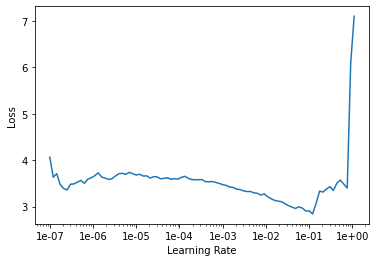

In [8]:
#learn.lr_find()
#learn.recorder.plot(skip_start=0, skip_end=2)

In [9]:
lr = 1e-01

In [10]:
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,time
0,7.051310,20150.958984,08:36
1,3.088779,78.101204,08:34
2,0.642816,4.947335,08:32


In [11]:
learn.unfreeze()
learn.freeze_to(3)
learn.fit_one_cycle(3, max_lr=slice(lr/100, lr/10))  

epoch,train_loss,valid_loss,time
0,0.665230,115.407921,08:32
1,0.644933,4.728983,08:37
2,0.563326,4.654966,08:37


In [12]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

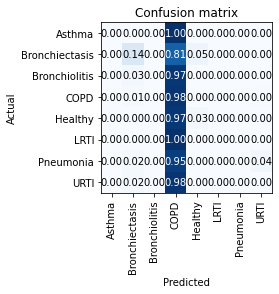

In [13]:
interp.plot_confusion_matrix(normalize=True)